In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/riley/Desktop/RAFTS/baseline_v3.0_10yrs_airmass.csv')
df

,night,observationStartMJD,fieldRA,fieldDec,airmass,filter,fiveSigmaDepth
0,0,60218.001806,298.603526,-15.574752,1.033698,y,22.546480
1,0,60218.002260,297.035243,-13.144502,1.047116,y,22.532127
2,0,60218.002715,295.418862,-15.854174,1.034846,y,22.546281
3,0,60218.004914,356.288005,-51.164810,1.445493,r,23.128326
4,0,60218.005362,0.158759,-53.139864,1.501800,r,23.075882
...,...,...,...,...,...,...,...
2086074,3652,63870.104316,13.901563,-17.221253,1.250412,y,21.765412
2086075,3652,63870.104764,16.409787,-19.359110,1.268161,y,21.700841
2086076,3652,63870.105213,13.628301,-20.218662,1.221875,y,21.743835
2086077,3652,63870.105661,11.069261,-18.110947,1.201746,y,21.765063


In [3]:
print(df['airmass'].mean() - df['airmass'].std())
print(df['airmass'].mean() + df['airmass'].std())

1.0369970963306128
1.5297586339849873


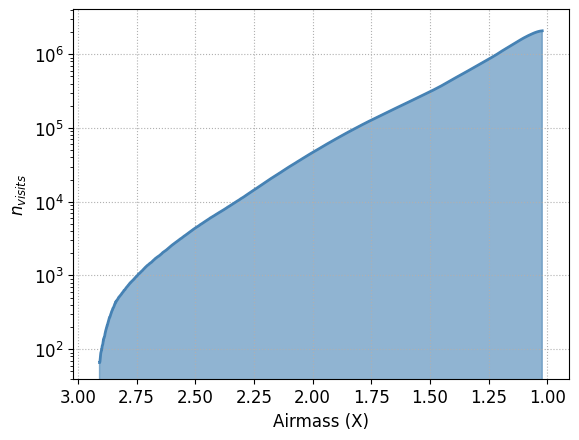

In [4]:
fig, ax = plt.subplots()

n, bins, patches = ax.hist(df['airmass'].values, bins=5000, cumulative=-1, histtype='step', fill=True, alpha=0.0)
ax.plot(bins[:-1][50:-40], n[50:-40], color='steelblue', linewidth=2)
ax.fill_between(bins[:-1][50:-40], n[50:-40], color='steelblue', alpha=0.6)

ax.set_xlabel('Airmass (X)', fontsize=12)
ax.set_ylabel(r'$n_{visits}$', fontsize=12)
ax.set_yscale('log')
ax.set_ylim(10**1.6,None)

ax.tick_params(axis='both', labelsize=12)

ax.grid(ls = ':')
plt.gca().invert_xaxis()
plt.savefig('/Users/riley/Desktop/RAFTS/Figures/airmassdist.png', dpi=300)

In [16]:
len(df['airmass'][df['airmass'] > 1.25]) / len(df['airmass'])

0.41001850840739973

In [11]:
ef3 = pd.read_csv('/Users/riley/Desktop/RAFTS/evryflareiii.csv', header=None)
ef3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,294750180,2018-10-20 5:36,34.66,34.44,7.24,0.65,6.59,0.043,34000,2300,18600,600,600,12.6,1.289,0.230,0.52553,0.540
1,229807000,2018-08-19 7:46,34.31,34.19,5.76,0.50,5.26,0.137,15500,400,12100,600,700,2.9,0.909,0.145,0.37456,0.355
2,382043650,2018-11-09 5:49,33.90,33.98,1.68,0.30,1.38,0.123,15100,300,7500,500,500,0.0,0.139,0.017,6.12559,0.290
3,5796048,2018-09-08 3:42,33.79,33.93,2.34,0.26,2.08,0.132,6900,300,6900,700,700,0.0,0.451,0.092,0.55570,0.420
4,339576478,2018-08-17 7:35,35.04,34.93,1.56,0.34,1.22,0.116,18400,600,11800,1700,2100,6.0,0.096,0.011,2.11342,0.565


In [14]:
np.save('ef3temps', ef3[8].values)

In [16]:
np.save('baseline3.0_am', df['airmass'].values)

# Other baselines

In [15]:
baselines = pd.read_csv('/Users/riley/Desktop/RAFTS/baselines_airmasses.csv')
baselines.set_index(baselines.columns[0], inplace=True)
baselines.head()

,baseline_v3.0,baseline_v2.2,baseline_v2.1,baseline_v2.0,retro_baseline_v2.0
Unnamed: 0,,,,,
0,1.033698,1.039333,1.172534,1.172534,1.103477
1,1.047116,1.053375,1.207046,1.207046,1.088316
2,1.034846,1.067421,1.248190,1.248190,1.115869
3,1.445493,1.088284,1.295605,1.295605,1.131347
4,1.501800,1.111693,1.371481,1.371481,1.149825
